# Importing all the libraries needed

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
from matplotlib.lines import Line2D
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, log_loss
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import time
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_score, adjusted_rand_score

# Context



Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

In [ ]:
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [ ]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# The Attributess include:
The following are the description of each feature:

    1. age - age in years
    
    2. sex - sex ( 0 = female; 1 = male)
    
    3. cp - chest pain type (0 = asymptomatic; 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain;)
    
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    
    5. chol - serum cholestoral in mg/dl
    
    6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    
    7. restecg - resting electrocardiographic results (0 = hypertrophy ;1 = normal; 2 = having ST-T wave abnormality)
    
    8. thalach - maximum heart rate achieved
    
    9. exang - exercise induced angina (1 = yes; 0 = no)
    
    10. oldpeak - ST depression induced by exercise relative to rest
    
    11. slope - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
    
    12. ca - number of major vessels (0-3) colored by fluoroscopy
    
    13. thal - 1 = fixed defect; 2 = normal; 3 = reversible defect
    
    
- output: output class [1: heart disease, 0: Normal]

# Exploratory Data Analysis



## First Question should be why do we need this ??

Out Come of this phase is as given below :

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

## Correlation Matrix
### Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

In [ ]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "thalach" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df,
                 x="output",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="cp",
                 color="sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="restecg",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

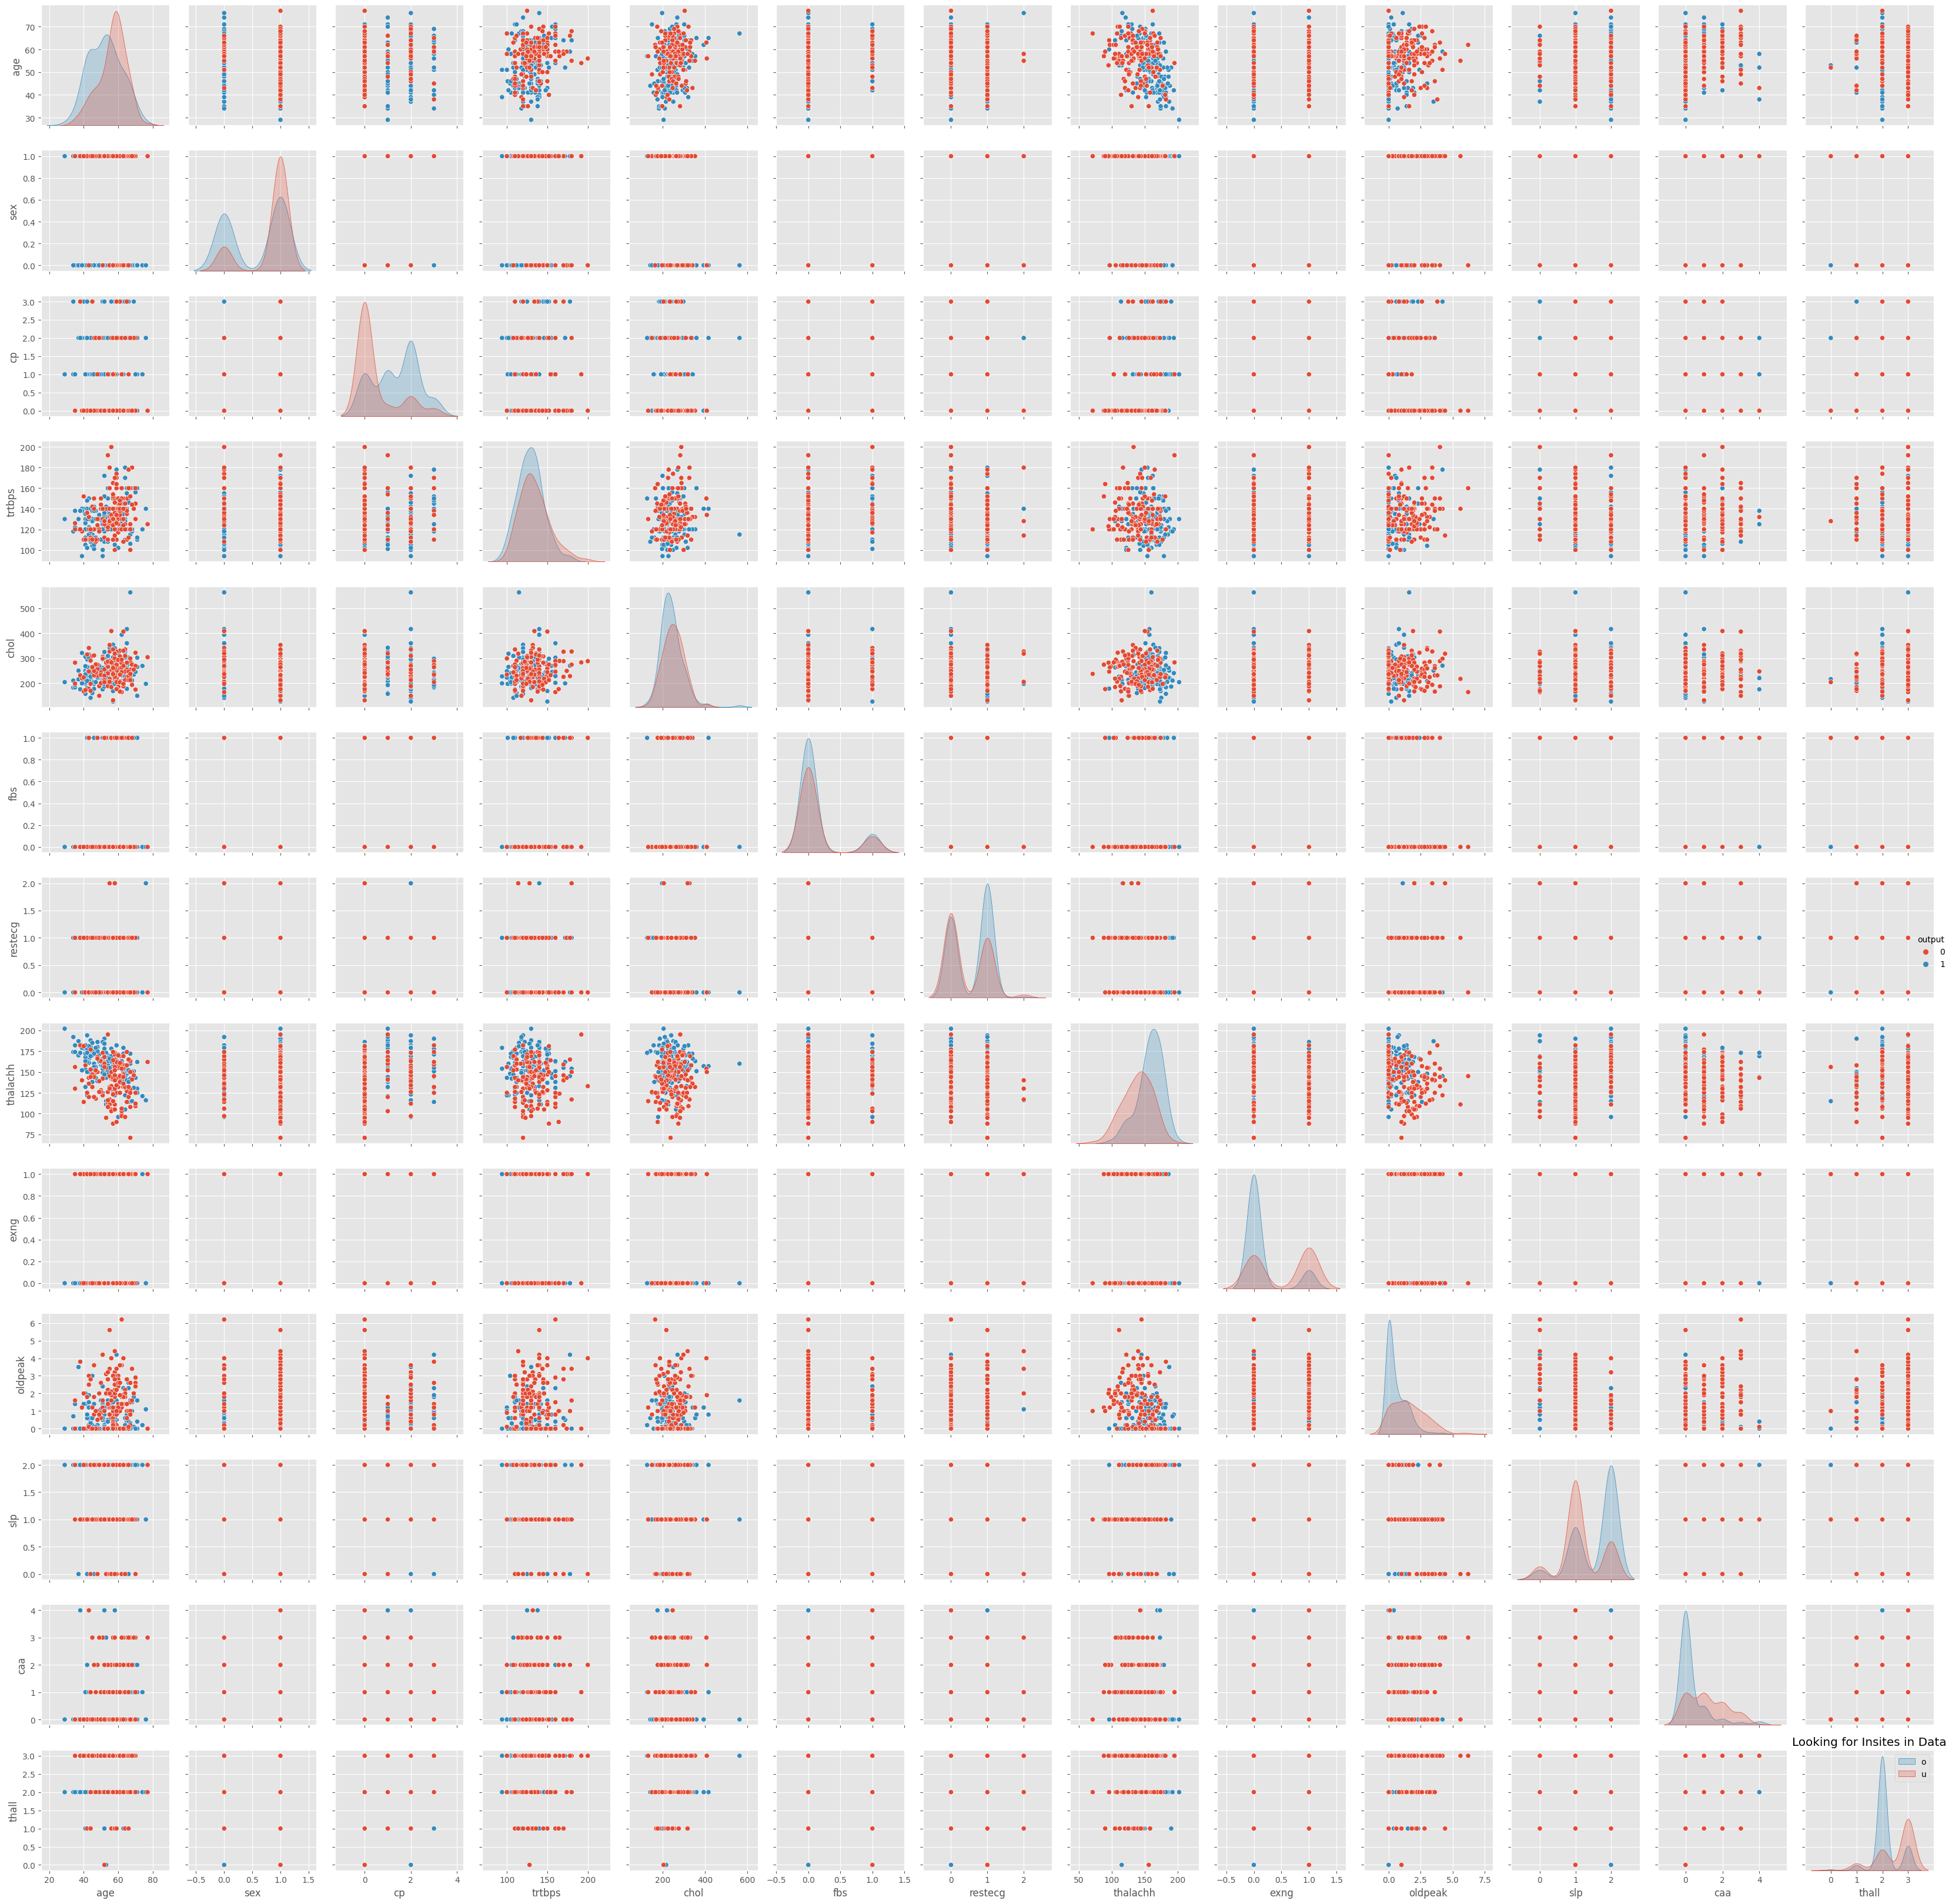

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("output")
plt.tight_layout()
plt.plot()

### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

[]

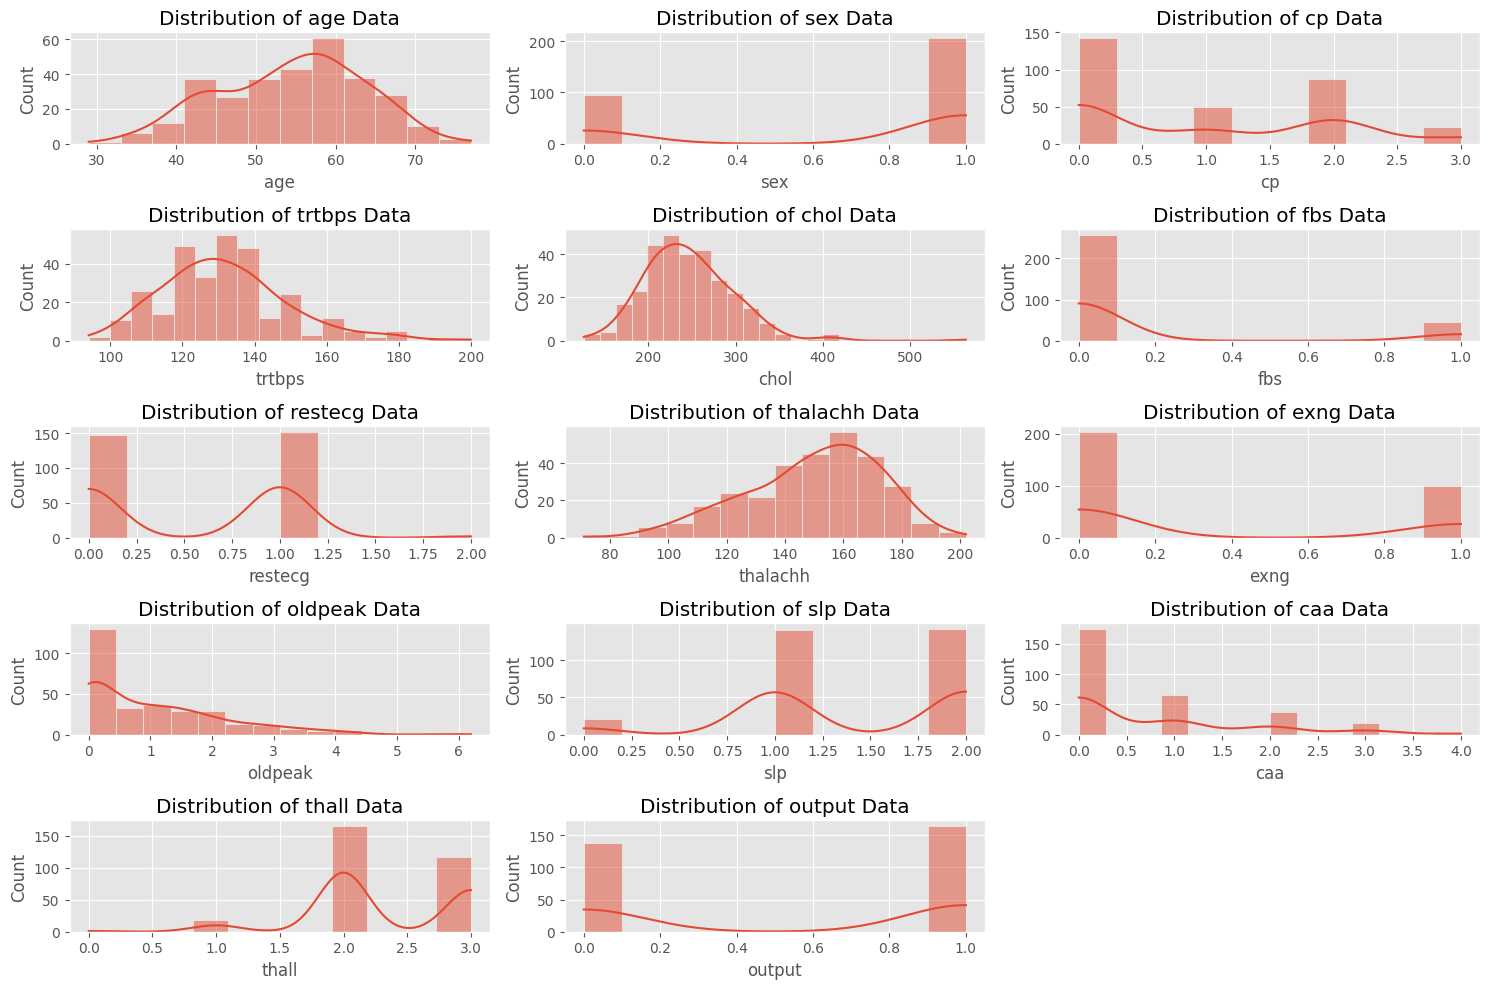

In [ ]:
import math

num_of_columns = len(df.columns)

# Calculate the number of subplot rows and columns
num_of_rows = math.ceil(num_of_columns / 3)  # Adjust the divisor to control the number of columns in your subplot grid

plt.figure(figsize=(15,10))

for i,col in enumerate(df.columns,1):
    plt.subplot(num_of_rows, 3, i)  # Adjust the second parameter to match the divisor above
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()

plt.plot()

In [ ]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']


In [ ]:
def grouping(age):
    if age>=18 and age<=30:
        return 0
    elif age>=31 and age<=40:
        return 1
    elif age>=41 and age<=50:
        return 2
    elif age>=51 and age<=60:
        return 3
    else:
        return 4

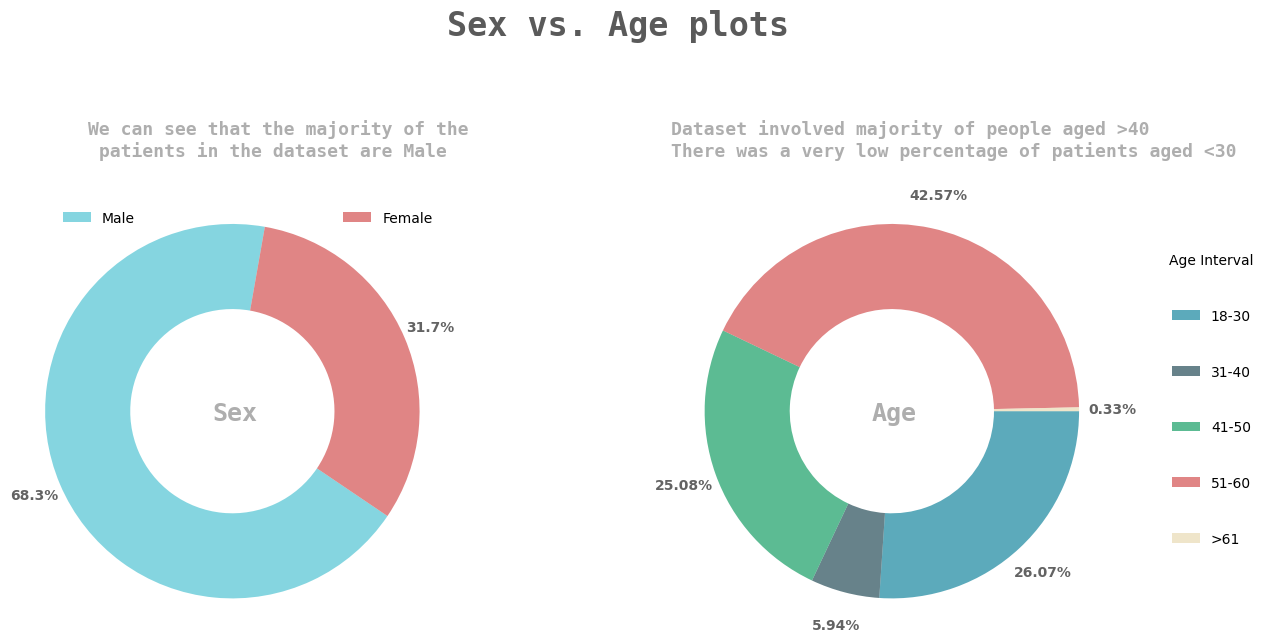

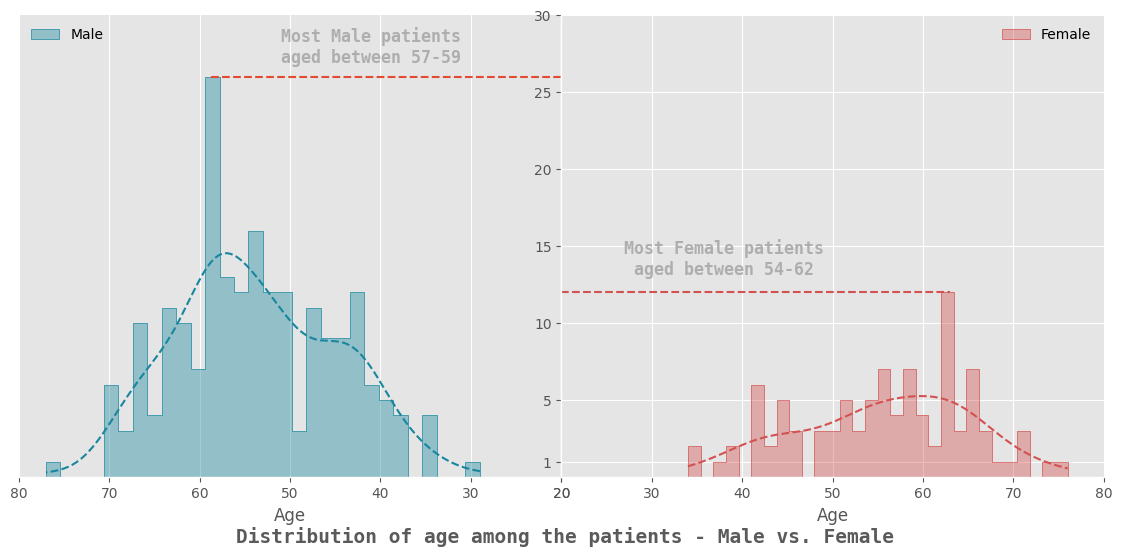

In [ ]:
age_int = df['age'].apply(grouping).value_counts(sort=False)

labels=['18-30','31-40','41-50','51-60','>61']


# Pie Charts

fig,ax = plt.subplots(1,2,figsize=(14,16))

fig.text(s='Sex vs. Age plots',size=24,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=0.73,x=0.43,alpha=0.8)

# Pie Chart - Left

ax[0].pie(df['sex'].value_counts(),autopct='{:.1f}%'.format,
          colors=[colors_blue[3],colors_red[3]],wedgeprops={'width':0.5,'alpha':0.7},
          pctdistance=1.15,startangle=80,radius=1.1,textprops={'fontsize': 10, 'color': colors_dark[2],
                                                               'fontweight': 'bold'})

ax[0].legend(['Male','Female'],frameon=False,ncol=2,columnspacing=15,loc='upper right')

ax[0].text(s='We can see that the majority of the\n patients in the dataset are Male',
               fontdict={'color':colors_dark[3],'size':13,'fontweight':'bold','fontname':'monospace',
                         },x=-0.85,y=1.5)

ax[0].text(s='Sex',fontdict={'color':colors_dark[3],'size':18,'fontweight':'semibold','fontname':'monospace'}
           ,x=-0.12,y=-0.05)

#Pie Chart - Right

ax[1].pie(age_int,autopct='{:.2f}%'.format,colors=colors_mix,wedgeprops={'width':0.5,'alpha':0.7},
          pctdistance=1.18,radius=1.1,textprops={'fontsize': 10, 'color': colors_dark[2],'fontweight': 'bold'},
         counterclock=False)

ax[1].legend(labels,frameon=False,bbox_to_anchor=(1.38,0.9),labelspacing=3,title='Age Interval')

ax[1].text(s='Dataset involved majority of people aged >40\nThere was a very low percentage of patients aged <30',
               fontdict={'color':colors_dark[3],'size':13,'fontweight':'bold','fontname':'monospace',
                         },x=-1.3,y=1.5)

ax[1].text(s='Age',fontdict={'color':colors_dark[3],'size':18,'fontweight':'semibold','fontname':'monospace'}
           ,x=-0.12,y=-0.05)


fig.subplots_adjust(wspace=0.55)

# Histograms with KDE

fig,ax = plt.subplots(1,2,figsize=(14,6),sharey=False)

# Left Hist

sns.histplot(df[df['sex']==1]['age'],ax=ax[0],bins=30,alpha=0.4,color=colors_blue[2],
             element='step',kde=True,line_kws={'ls':'--'})
ax[0].set_xlim(20,80)
ax[0].set_ylim(0,30)
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].yaxis.tick_right()
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Age')
ax[0].legend(['Male'],loc='upper left',frameon=False)
ax[0].axhline(y=26,xmin=1,xmax=1-(39/60),ls='--')

ax[0].set_title('Most Male patients\naged between 57-59',y=0.88,x=0.65,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})

# Right Hist

sns.histplot(df[df['sex']==0]['age'],ax=ax[1],bins=30,alpha=0.4,color=colors_red[3],
             element='step',kde=True,line_kws={'ls':'--'})
ax[1].set_xlim(20,80)
ax[1].set_ylim(0,30)
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([1,5,10,15,20,25,30])
ax[1].set_xlabel('Age')
ax[1].legend(['Female'],loc='upper right',frameon=False)
ax[1].axhline(y=12,xmin=0,xmax=43/60,ls='--',color=colors_red[3])

ax[1].set_title('Most Female patients\naged between 54-62',y=0.42,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})
fig.subplots_adjust(wspace=0)

fig.text(s='Distribution of age among the patients - Male vs. Female',size=14,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0,x=0.28,alpha=0.8)

plt.show()

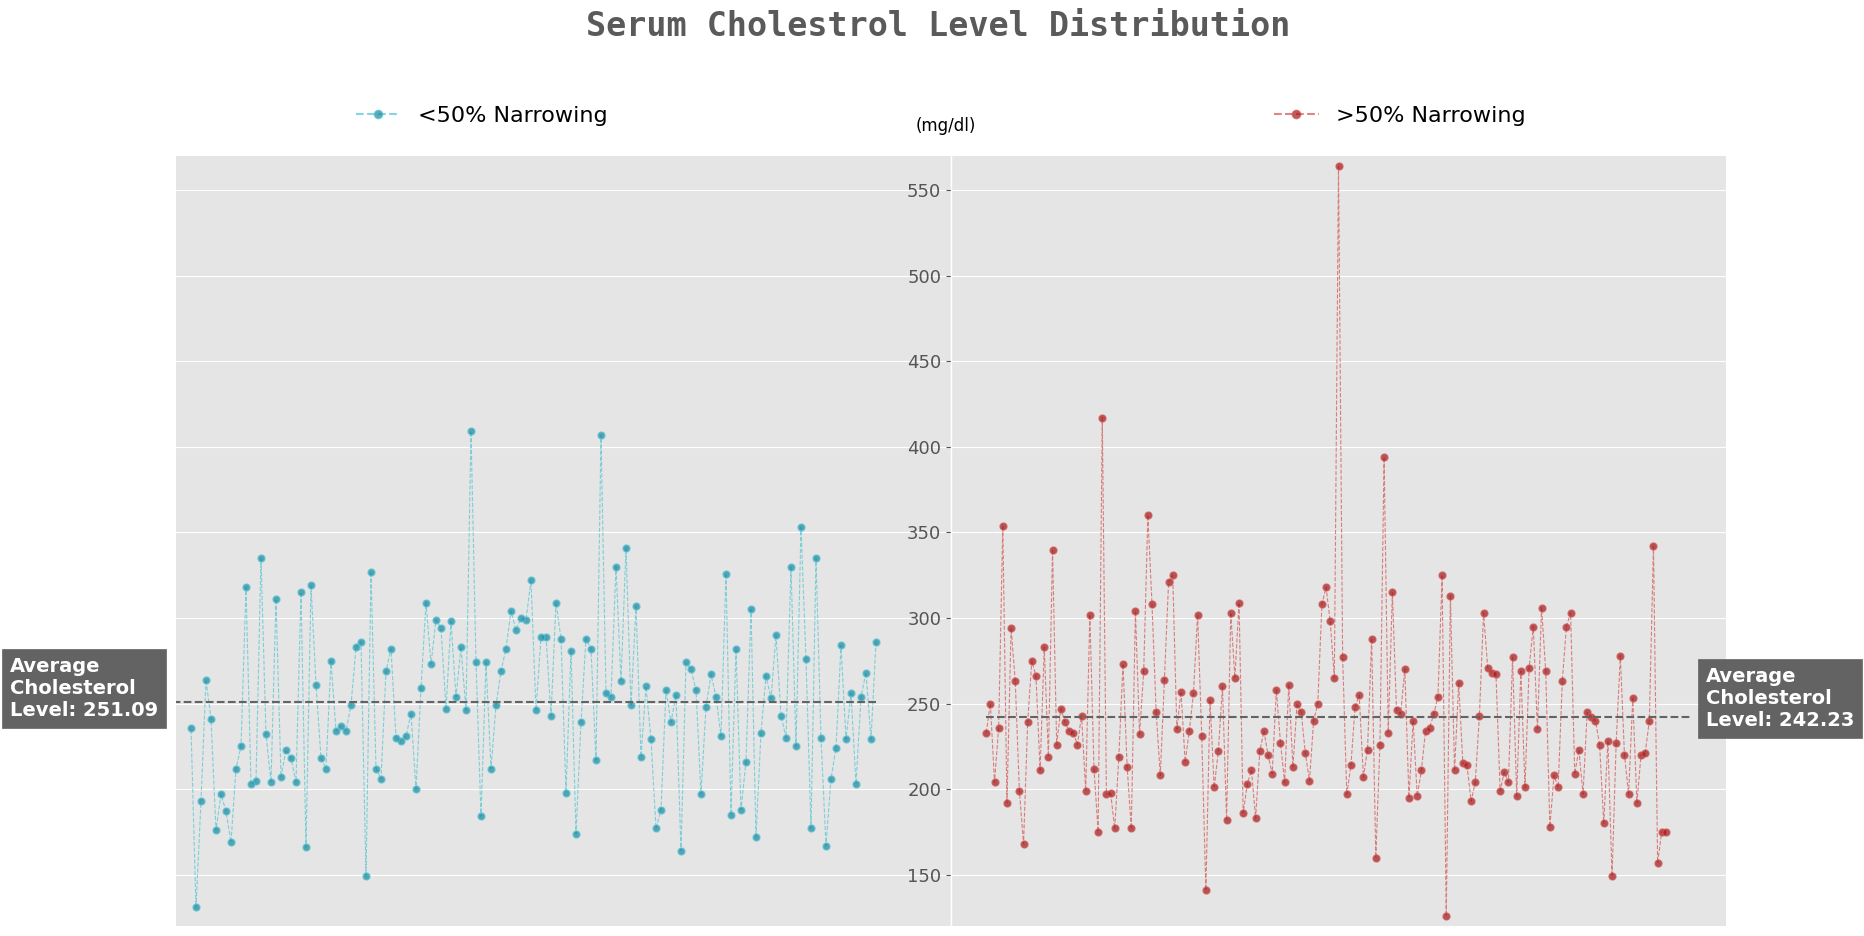

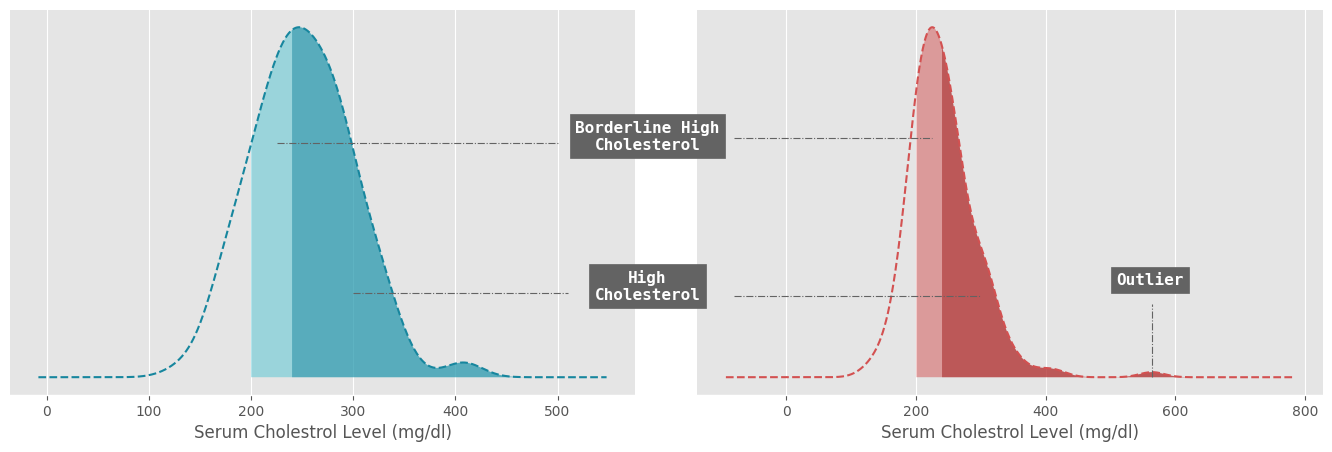

In [ ]:
import warnings
warnings.filterwarnings('ignore')

mean_0 = df[df['output']==0]['chol'].mean()
mean_1 = df[df['output']==1]['chol'].mean()

custom_lines = [Line2D([0], [0], marker='o', color=colors_blue[3], markerfacecolor=colors_blue[2],ls='--',
                       alpha=0.7),
                Line2D([0], [0], marker='o', color=colors_red[3], markerfacecolor=colors_red[2],ls='--',
                       alpha=0.7)]

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=False)

fig.text(s='Serum Cholestrol Level Distribution',size=24,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.33,alpha=0.8)


# Left Line Plot

ax[0].plot(df[df['output']==0]['chol'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_blue[3],
            markerfacecolor=colors_blue[2],markersize=5)
ax[0].hlines(mean_0,xmin=165,xmax=400,ls='--',color=colors_dark[2])
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].set_ylim(120,570)
ax[0].set_xticks([])
ax[0].set_xlim(305,150)
ax[0].yaxis.tick_right()
ax[0].spines['bottom'].set_color(None)
fig.text(s='Average\nCholesterol\nLevel: {:.2f}'.format(mean_0),x=0.042,y=0.32,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')


# Right Line Plot

ax[1].plot(df[df['output']==1]['chol'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_red[3],
          markerfacecolor=colors_red[2],markersize=5)
ax[1].hlines(mean_1,xmin=0,xmax=170,ls='--',color=colors_dark[2])
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].spines['bottom'].set_color(None)
ax[1].set_ylim(120,570)
ax[1].set_xticks([])
ax[1].tick_params(axis='y', which='major', labelsize=13)
ax[1].set_title('',y=0.42,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})
fig.text(s='Average\nCholesterol\nLevel: {:.2f}'.format(mean_1),x=0.89,y=0.31,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')

fig.text(s='(mg/dl)',x=0.51,y=0.905,fontdict={'color':'black','size':12,'ha':'center'})


fig2,ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
sns.despine(fig2)

# Left KDE Plot

df[df['output']==0]['chol'].plot.kde(ls='--',color=colors_blue[2],ax=ax[0])
ax[0].spines['left'].set_color(None)
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Serum Cholestrol Level (mg/dl)',fontsize=12)
line = ax[0].get_lines()[-1]
x, y = line.get_data()
mask1 = x > 200
mask2 = x>=240
x1, y1 = x[mask1], y[mask1]
x2,y2 = x[mask2],y[mask2]
ax[0].fill_between(x1, y1, alpha=0.5, facecolor=colors_blue[3])
ax[0].fill_between(x2, y2, alpha=0.5, facecolor=colors_blue[2])
ax[0].hlines(0.0018,xmin=300,xmax=510,ls='-.',color=colors_dark[2],lw=0.8)
ax[0].hlines(0.005,xmin=225,xmax=500,ls='-.',color=colors_dark[2],lw=0.8)

# Right KDE Plot

df[df['output']==1]['chol'].plot.kde(ls='--',color=colors_red[3],ax=ax[1])
ax[1].spines['left'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([])
fig2.text(s='',
          x=0.55,y=0.65,
         fontdict={'color':colors_dark[3],'size':14,'fontweight':'semibold','fontname':'monospace','ha':'center'})
ax[1].set_xlabel('Serum Cholestrol Level (mg/dl)',fontsize=12)
line = ax[1].get_lines()[-1]
x,y = line.get_data()
mask1 = x > 200
mask2 = x>=240
x1, y1 = x[mask1], y[mask1]
x2,y2 = x[mask2],y[mask2]
ax[1].fill_between(x1, y1, alpha=0.5, facecolor=colors_red[3])
ax[1].fill_between(x2, y2, alpha=0.5, facecolor=colors_red[2])
ax[1].hlines(0.0020,xmin=-80,xmax=300,ls='-.',color=colors_dark[2],lw=0.8)
ax[1].hlines(0.0059,xmin=-80,xmax=225,ls='-.',color=colors_dark[2],lw=0.8)
ax[1].vlines(x=564,ymin=0,ymax=0.0018,ls='-.',color=colors_dark[2],lw=0.8)

fig2.text(s='High\nCholesterol',x=0.55,y=0.30,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
fig2.text(s='Borderline High\nCholesterol',x=0.55,y=0.60,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
fig2.text(s='Outlier',x=0.885,y=0.33,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold',
                   'fontname':'monospace','ha':'center'},backgroundcolor=colors_dark[2])


fig.legend(handles=custom_lines,labels=('<50% Narrowing','>50% Narrowing'),frameon=False,
           ncol=2,bbox_to_anchor=(0.81,0.95),columnspacing=30,fontsize=16)



fig.subplots_adjust(wspace=0)
fig2.subplots_adjust(wspace=0.1,right=1)


# Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
- Minimum
- First quartile
- Median
- Third quartile
- Maximum.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [ ]:

fig = px.box(df,y="age",x="output",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="trtbps",x="output",title=f"Distrubution of trtbps",color="sex")
fig.show()

In [ ]:
fig = px.box(df,y="chol",x="output",title=f"Distrubution of chol")
fig.show()

In [ ]:
fig = px.box(df,y="oldpeak",x="output",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="thalachh",x="output",title=f"Distrubution of thalach")
fig.show()

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

# 1. Handling Null Values :
In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

> In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.


In [ ]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:

# Checking for NULLs in the data
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#Training

##K-Means

In [ ]:
# Define your features and target
features = df.drop('output', axis=1)
target = df['output']

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

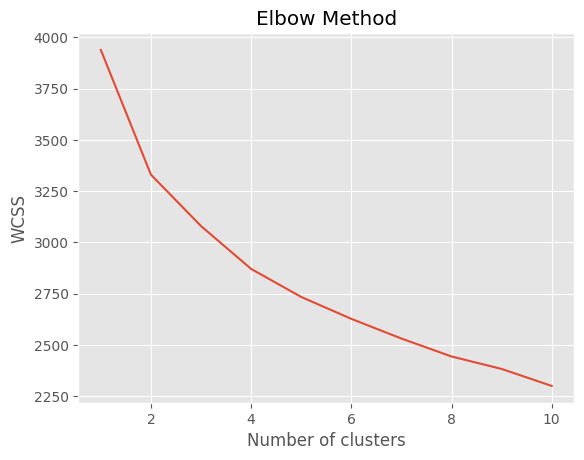

In [ ]:

import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):  # Here, we compute WCSS for k = 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

as we can see we have 2 classes

In [ ]:

# Train K-means on the training data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)

# Predict clusters on the training data (not typical, just for demonstration)
train_clusters = kmeans.predict(scaled_features)

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
# # Add the predicted clusters as a new column to your datase
# data_with_clusters = pd.DataFrame(np.column_stack([features, train_clusters]), columns=list(features.columns) + ['Predicted_Cluster'])


Silhouette Score: 0.1669496986497795


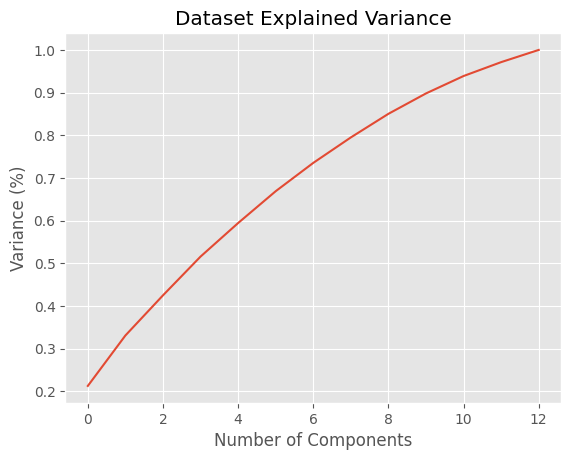

In [ ]:


# Apply PCA
pca = PCA().fit(scaled_features)

# Plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Dataset Explained Variance')
plt.show()

most of the data receved on 2 bins

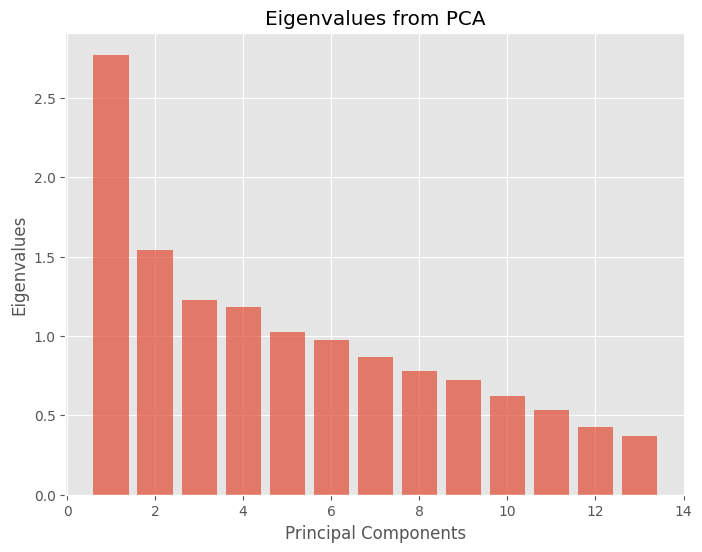

In [ ]:
# Obtain eigenvalues
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7)
plt.title('Eigenvalues from PCA')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(scaled_features)

In [ ]:
# Train K-means on the training data
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels=kmeans.fit(data_pca)

# Predict clusters on the training data (not typical, just for demonstration)
train_clusters = kmeans.predict(data_pca)
silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
df_kmeans=features.copy()

# Add the predicted clusters as a new column to your datase
data_with_clusters = pd.DataFrame(np.column_stack([df_kmeans, train_clusters]), columns=list(df_kmeans.columns) + ['Predicted_Cluster'])

Silhouette Score: 0.42201696965241414


Text(0, 0.5, 'Principal Component 2')

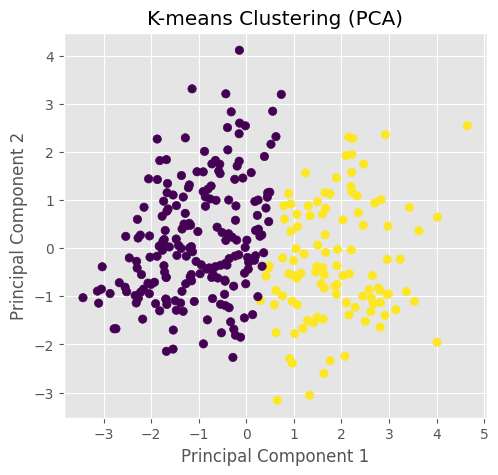

In [ ]:

# Visualize clustered data in 2D
plt.figure(figsize=(12, 5))

# K-means clusters
plt.subplot(121)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [ ]:
# Apply ICA for dimensionality reduction
ica = FastICA(n_components=2, random_state=42)
data_ica = ica.fit_transform(scaled_features)


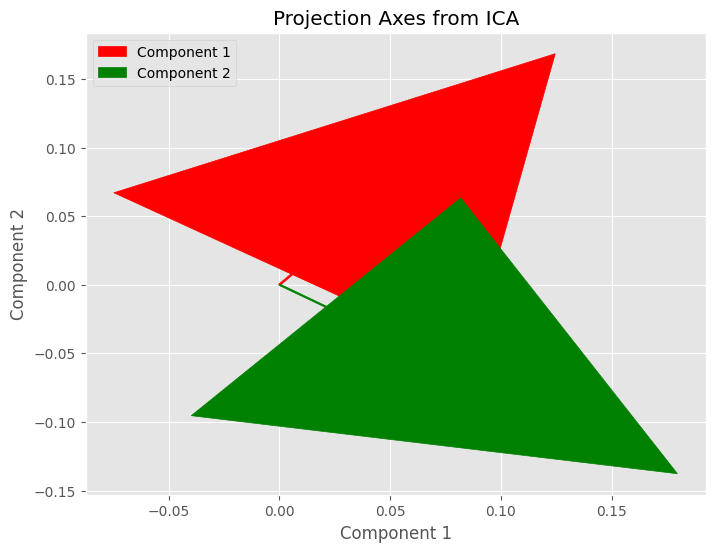

In [ ]:


# Get the components or projection axes
components = ica.components_

# Plot the projection axes
plt.figure(figsize=(8, 6))
for i, (comp, color) in enumerate(zip(components, ['r', 'g'])):
    plt.arrow(0, 0, comp[0], comp[1], head_width=0.2, head_length=0.2, fc=color, ec=color, label=f'Component {i+1}')

plt.title('Projection Axes from ICA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

The Silhouette Score is a metric used to measure the quality of clustering in a dataset. It provides insight into the separation distance between clusters and how well-defined they are.

In [ ]:
# Train K-means on the training data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_ica)
silhouette_avg = silhouette_score(data_ica, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
# Predict clusters on the training data (not typical, just for demonstration)
train_clusters = kmeans.predict(data_ica)

 Silhouette Score of 0.3617 indicates reasonably well-defined clusters, suggesting a moderate degree of separation between clusters. This score indicates that the data points are relatively well-clustered compared to the average distance to points in neighboring clusters.

In [ ]:
# Visualize clustered data in 2D
# Visualize clustered data in 2D
plt.figure(figsize=(12, 5))

# K-means clusters
plt.subplot(121)
plt.scatter(data_ica[:, 0], data_ica[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering (ICA)')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')

##GMM

In [ ]:
# Define your features and target
features = df.drop('output', axis=1)
target = df['output']

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(scaled_features)

In [ ]:

# Train Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_pca)
silhouette_avg = silhouette_score(data_pca, gmm.predict(data_pca))

print("Silhouette Score:", silhouette_avg)


a Silhouette Score of 0.4194 indicates relatively well-defined clusters with a moderate to high degree of separation between them. This suggests that the clusters are cohesive and the points within each cluster are closer to each other than to points in neighboring clusters.

In [ ]:
# Predict clusters on the PCA-reduced data
predicted_clusters = gmm.predict(data_pca)

# Visualize the clusters in 2D (PCA space)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=predicted_clusters, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Apply ICA for dimensionality reduction
ica = FastICA(n_components=2, random_state=42)
data_ica = ica.fit_transform(scaled_features)


In [ ]:
# Train K-means on the training data
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_ica)
silhouette_avg = silhouette_score(data_ica, gmm.predict(data_ica))
print("Silhouette Score:", silhouette_avg)

# Predict clusters on the training data (not typical, just for demonstration)
train_clusters = kmeans.predict(data_ica)

In [ ]:
# GMM clusters
plt.subplot(122)
plt.scatter(data_ica[:, 0], data_ica[:, 1], c=train_clusters, cmap='viridis')
plt.title('Gaussian Mixture Model (ICA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()